In [ ]:
import pandas as pd
from datetime import datetime, timedelta
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt


In [ ]:
regioni = pd.read_csv('https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-regioni/dpc-covid19-ita-regioni.csv', parse_dates=['data'], error_bad_lines=False)
regioni.data = regioni.data.dt.date


In [ ]:
df_ti = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Data/C_17_dataset_17_0_upFile.csv', encoding='Latin', sep=';')
df_ti['Descrizione disciplina'] = df_ti['Descrizione disciplina'].str.strip()

In [ ]:
df_ti['Anno'].unique()

array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018])

In [ ]:
df_ti = df_ti[(df_ti['Descrizione disciplina']=='TERAPIA INTENSIVA')&(df_ti['Anno']==2018)]
df_ti

,Anno,Codice Regione,Descrizione Regione,Codice disciplina,Descrizione disciplina,Tipo di Disciplina,N° Reparti,Posti letto degenza ordinaria,Posti letto degenza a pagamento,Posti letto Day Hospital,Posti letto Day Surgery,Totale posti letto
7936,2018,10,PIEMONTE,49,TERAPIA INTENSIVA,ACUTI,46,299,0,18,0,317
7975,2018,20,VALLE D`AOSTA,49,TERAPIA INTENSIVA,ACUTI,2,10,0,0,2,12
8018,2018,30,LOMBARDIA,49,TERAPIA INTENSIVA,ACUTI,106,849,4,6,0,859
8060,2018,41,PROV. AUTON. BOLZANO,49,TERAPIA INTENSIVA,ACUTI,5,40,0,0,0,40
8097,2018,42,PROV. AUTON. TRENTO,49,TERAPIA INTENSIVA,ACUTI,4,31,0,1,0,32
8141,2018,50,VENETO,49,TERAPIA INTENSIVA,ACUTI,55,484,0,3,0,487
8188,2018,60,FRIULI VENEZIA GIULIA,49,TERAPIA INTENSIVA,ACUTI,19,125,0,2,0,127
8233,2018,70,LIGURIA,49,TERAPIA INTENSIVA,ACUTI,20,183,0,3,0,186
8288,2018,80,EMILIA ROMAGNA,49,TERAPIA INTENSIVA,ACUTI,55,444,0,3,2,449
8345,2018,90,TOSCANA,49,TERAPIA INTENSIVA,ACUTI,52,365,0,10,2,377


In [ ]:
regioni.head()

,data,stato,codice_regione,denominazione_regione,lat,long,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,casi_da_sospetto_diagnostico,casi_da_screening,totale_casi,tamponi,casi_testati,note
0,2020-02-24,ITA,13,Abruzzo,42.351222,13.398438,0,0,0,0,0,0,0,0,0,NaN,NaN,0,5,NaN,NaN
1,2020-02-24,ITA,17,Basilicata,40.639471,15.805148,0,0,0,0,0,0,0,0,0,NaN,NaN,0,0,NaN,NaN
2,2020-02-24,ITA,18,Calabria,38.905976,16.594402,0,0,0,0,0,0,0,0,0,NaN,NaN,0,1,NaN,NaN
3,2020-02-24,ITA,15,Campania,40.839566,14.250850,0,0,0,0,0,0,0,0,0,NaN,NaN,0,10,NaN,NaN
4,2020-02-24,ITA,8,Emilia-Romagna,44.494367,11.341721,10,2,12,6,18,0,18,0,0,NaN,NaN,18,148,NaN,NaN


In [ ]:
%%time

regioni['media_mobile'] = regioni.sort_values(by='data').groupby('denominazione_regione')['totale_casi'].pct_change(periods=7).mul(100).round(2)


CPU times: user 11 ms, sys: 1.92 ms, total: 12.9 ms
Wall time: 16.7 ms


In [ ]:
regioni.tail()

,data,stato,codice_regione,denominazione_regione,lat,long,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,casi_da_sospetto_diagnostico,casi_da_screening,totale_casi,tamponi,casi_testati,note,media_mobile
5140,2020-10-25,ITA,19,Sicilia,38.115697,13.362357,642,95,737,9818,10555,666,695,5914,428,10855.0,6042.0,16897,642351,456572.0,NaN,37.46
5141,2020-10-25,ITA,9,Toscana,43.769231,11.255889,714,111,825,16495,17320,1632,1863,12708,1262,24763.0,6527.0,31290,1000835,671386.0,NaN,37.22
5142,2020-10-25,ITA,10,Umbria,43.106758,12.388247,215,29,244,4151,4395,374,463,2795,105,2575.0,4720.0,7295,277303,162084.0,NaN,53.84
5143,2020-10-25,ITA,2,Valle d'Aosta,45.737503,7.320149,63,2,65,1116,1181,88,97,1191,153,2265.0,260.0,2525,37826,24256.0,NaN,39.43
5144,2020-10-25,ITA,5,Veneto,45.434905,12.338452,585,71,656,16316,16972,1351,1468,25036,2329,24005.0,20332.0,44337,2238353,871568.0,NaN,23.67


In [ ]:
%%time
regioni['diff_tamponi'] = regioni.groupby('denominazione_regione')['tamponi'].diff(periods=1)
regioni['perc_tamponi_pos'] = (regioni.nuovi_positivi/regioni.diff_tamponi).mul(100).round(2)
regioni.head(10)

CPU times: user 11.4 ms, sys: 1.57 ms, total: 13 ms
Wall time: 13.4 ms


In [ ]:
%%time
regioni.tail()

CPU times: user 153 µs, sys: 35 µs, total: 188 µs
Wall time: 196 µs


,data,stato,codice_regione,denominazione_regione,lat,long,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,casi_da_sospetto_diagnostico,casi_da_screening,totale_casi,tamponi,casi_testati,note,media_mobile,diff_tamponi,perc_tamponi_pos
5140,2020-10-25,ITA,19,Sicilia,38.115697,13.362357,642,95,737,9818,10555,666,695,5914,428,10855.0,6042.0,16897,642351,456572.0,NaN,37.46,5193.0,13.38
5141,2020-10-25,ITA,9,Toscana,43.769231,11.255889,714,111,825,16495,17320,1632,1863,12708,1262,24763.0,6527.0,31290,1000835,671386.0,NaN,37.22,13811.0,13.49
5142,2020-10-25,ITA,10,Umbria,43.106758,12.388247,215,29,244,4151,4395,374,463,2795,105,2575.0,4720.0,7295,277303,162084.0,NaN,53.84,3397.0,13.63
5143,2020-10-25,ITA,2,Valle d'Aosta,45.737503,7.320149,63,2,65,1116,1181,88,97,1191,153,2265.0,260.0,2525,37826,24256.0,NaN,39.43,301.0,32.23
5144,2020-10-25,ITA,5,Veneto,45.434905,12.338452,585,71,656,16316,16972,1351,1468,25036,2329,24005.0,20332.0,44337,2238353,871568.0,NaN,23.67,12061.0,12.17


In [ ]:
campania = regioni[regioni.denominazione_regione == 'Campania']

In [ ]:
from scipy.interpolate import interp1d


In [ ]:
y = campania['totale_positivi'].to_numpy()


In [ ]:
y = y.astype(float)

In [ ]:
dy = np.diff(y)
dy

array([ 0.000e+00,  0.000e+00,  3.000e+00,  1.000e+00,  9.000e+00,
        4.000e+00,  0.000e+00,  1.300e+01,  1.000e+00,  1.400e+01,
        1.200e+01,  4.000e+00,  3.900e+01,  1.900e+01,  7.000e+00,
        2.300e+01,  2.500e+01,  3.900e+01,  3.000e+01,  5.300e+01,
        6.700e+01,  6.000e+01,  0.000e+00,  1.820e+02,  9.700e+01,
        9.100e+01,  7.300e+01,  6.300e+01,  6.300e+01,  8.000e+01,
        9.700e+01,  1.230e+02,  1.150e+02,  1.490e+02,  1.830e+02,
        1.320e+02,  1.050e+02,  1.640e+02,  2.120e+02,  1.440e+02,
        1.250e+02,  7.700e+01,  6.700e+01,  9.400e+01,  1.400e+01,
        9.000e+01,  3.900e+01,  5.500e+01,  5.000e+00,  3.200e+01,
       -7.000e+00,  3.100e+01, -9.100e+01,  1.800e+01, -2.300e+01,
       -3.000e+00, -7.300e+01,  5.200e+01, -2.000e+01, -3.500e+01,
       -8.000e+00, -1.100e+01, -4.700e+01, -7.500e+01, -2.000e+01,
       -9.000e+00, -2.000e+01, -3.200e+01,  5.000e+00, -1.500e+01,
       -1.810e+02, -1.900e+02, -2.010e+02, -1.270e+02, -4.700e

In [ ]:
idx = np.where(dy == 0.0)[0]
idx

array([  0,   1,   6,  22, 116, 122, 124, 165])

In [ ]:
y_fixed = y.copy()

In [ ]:
x = np.arange(y.shape[0])


In [ ]:
y_fixed[idx + 1] += 0.001


In [ ]:
f = interp1d(y_fixed, x, fill_value="extrapolate")


In [ ]:
y_half = y / 2.0

# get the according x values by interpolation
x_interp = f(y_half)

# delta between the current day and the date when
# the value was half
dbl = x - x_interp

# this already looks quite good, but double check!
dbl.round(0)

array([   0.,    1.,    2.,    1.,    1.,    1.,    2.,    2.,    2.,
          3.,    3.,    3.,    4.,    3.,    2.,    3.,    4.,    4.,
          5.,  -38., -101., -106.,  -10.,   -9., -124., -121., -134.,
       -143., -143., -144., -144., -145.,  -85.,    0.,  -85.,  -65.,
        -38.,  -36.,   -2.,  -20.,  -50., -124.,  -75.,  -29., -107.,
        -70.,  -39.,  -38.,  -23.,  -19.,    4.,    0.,    7.,  -32.,
        -25.,  -30.,  -29.,  -29.,  -27.,  -26.,  -26.,  -25.,  -24.,
        -41.,   21.,    7.,    0.,  -14.,  -35.,  -30.,  -39.,  -19.,
         37.,   31.,   -0.,  -21.,  -22.,  -21.,  -16.,  -61.,  -19.,
          5.,   32.,   19.,   -4.,  -17.,  -18.,   16.,  -29.,  -34.,
        -40.,   42.,  -84.,  -82.,  -79.,  -78.,  -77.,  -76.,  -74.,
        -72.,  -70.,    8.,  -64.,  -57.,   77.,   30.,   -9.,  -12.,
        -40.,   81.,   35.,    6.,   -8.,   -6.,   -4.,   67.,  104.,
        105.,  106.,  107.,  108.,  109.,  109.,  110.,  111.,  112.,
        113.,  114.,

In [ ]:
len(dbl)

245

In [ ]:
sub = regioni[['data', 'denominazione_regione','totale_ospedalizzati']]
sub.head()

,data,denominazione_regione,totale_ospedalizzati
0,2020-02-24,Abruzzo,0
1,2020-02-24,Basilicata,0
2,2020-02-24,Calabria,0
3,2020-02-24,Campania,0
4,2020-02-24,Emilia-Romagna,12


In [ ]:
sub_pivot = sub.pivot(index='denominazione_regione', columns='data', values='totale_ospedalizzati')

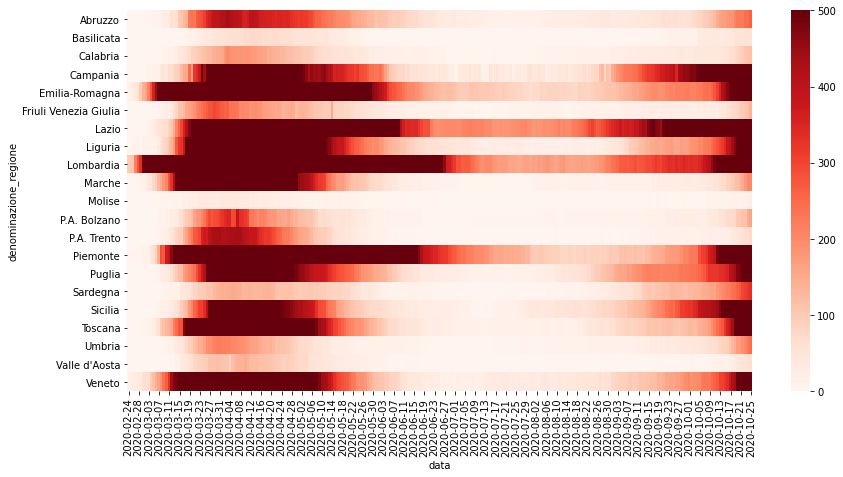

In [ ]:
plt.figure(figsize=(14, 7))
sns.heatmap(sub_pivot, vmin=0, vmax=500, cmap='Reds')

In [ ]:
popdf = pd.read_csv('https://raw.githubusercontent.com/RomanTomz/Covid-Outbreaks-Dashboard-Italy/master/popdf.csv')

In [ ]:
popdf

,Regione,Popolazioneresidenti
0,Lombardia,10103969
1,Lazio,5865544
2,Campania,5785861
3,Sicilia,4968410
4,Veneto,4907704
5,Emilia-Romagna,4467118
6,Piemonte,4341375
7,Puglia,4008296
8,Toscana,3722729
9,Calabria,1924701


In [ ]:
sub = sub.merge(popdf, how='inner', left_on='denominazione_regione',right_on='Regione')
sub['osp_100k'] = (sub['totale_ospedalizzati'] / sub['Popolazioneresidenti']).mul(100000).round(2)

In [ ]:
sub.data = pd.to_datetime(sub.data).dt.strftime('%m-%d')


In [ ]:
sub

,data,denominazione_regione,totale_ospedalizzati,Regione,Popolazioneresidenti,osp_100k
0,02-24,Abruzzo,0,Abruzzo,1305770,0.00
1,02-25,Abruzzo,0,Abruzzo,1305770,0.00
2,02-26,Abruzzo,0,Abruzzo,1305770,0.00
3,02-27,Abruzzo,1,Abruzzo,1305770,0.08
4,02-28,Abruzzo,1,Abruzzo,1305770,0.08
...,...,...,...,...,...,...
4650,10-21,Veneto,495,Veneto,4907704,10.09
4651,10-22,Veneto,559,Veneto,4907704,11.39
4652,10-23,Veneto,579,Veneto,4907704,11.80
4653,10-24,Veneto,616,Veneto,4907704,12.55


In [ ]:
sub_pivot = sub.pivot(index='denominazione_regione', columns='data', values='osp_100k')

In [ ]:
sub_pivot

data,02-24,02-25,02-26,02-27,02-28,02-29,03-01,03-02,03-03,03-04,03-05,03-06,03-07,03-08,03-09,03-10,03-11,03-12,03-13,03-14,03-15,03-16,03-17,03-18,03-19,03-20,03-21,03-22,03-23,03-24,03-25,03-26,03-27,03-28,03-29,03-30,03-31,04-01,04-02,04-03,...,09-16,09-17,09-18,09-19,09-20,09-21,09-22,09-23,09-24,09-25,09-26,09-27,09-28,09-29,09-30,10-01,10-02,10-03,10-04,10-05,10-06,10-07,10-08,10-09,10-10,10-11,10-12,10-13,10-14,10-15,10-16,10-17,10-18,10-19,10-20,10-21,10-22,10-23,10-24,10-25
denominazione_regione,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Abruzzo,0.00,0.00,0.00,0.08,0.08,0.15,0.23,0.23,0.38,0.54,0.61,0.69,0.84,1.07,1.91,1.99,1.99,4.52,4.29,4.98,7.66,8.27,9.65,10.72,17.46,18.23,17.54,20.45,21.44,22.29,23.51,26.34,27.57,29.18,30.40,29.94,31.25,31.63,31.86,33.47,...,3.60,3.83,4.06,4.06,4.06,4.82,4.52,4.52,4.14,4.82,4.52,4.21,4.44,4.29,4.37,4.37,4.90,5.51,5.82,6.05,6.66,7.20,7.43,8.19,8.96,9.50,11.33,12.33,12.94,12.94,13.63,13.94,14.01,16.08,17.23,17.31,17.15,18.69,18.84,20.14
Basilicata,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.18,0.18,0.36,0.36,0.36,0.36,0.36,0.36,0.36,0.36,0.54,1.26,1.98,2.33,2.33,3.41,4.13,4.85,4.67,6.10,6.82,6.64,8.08,8.98,9.70,9.70,9.70,10.23,10.77,...,1.26,1.26,1.26,1.26,1.26,1.44,1.98,2.33,2.51,2.51,2.69,2.51,2.51,2.51,2.33,2.33,2.33,3.05,3.05,5.75,5.75,6.28,6.28,6.28,6.46,6.46,6.46,6.10,6.28,6.46,6.46,7.18,7.72,9.34,9.34,9.34,9.34,10.41,10.41,10.41
Calabria,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.05,0.10,0.10,0.26,0.42,0.52,0.62,0.83,1.09,1.35,1.97,2.23,2.86,2.91,3.79,4.52,4.62,4.88,5.30,5.66,6.03,6.44,6.49,6.70,7.43,7.69,7.74,8.31,9.46,10.39,...,1.56,1.56,1.45,1.61,1.77,1.77,1.71,1.61,1.71,1.82,1.66,1.92,1.97,1.87,1.82,1.77,1.82,1.97,1.97,2.03,2.03,1.97,2.08,2.23,2.18,2.18,2.23,2.23,2.34,2.81,2.86,3.27,3.43,3.69,4.10,4.52,4.88,5.66,5.72,6.03
Campania,0.00,0.00,0.00,0.03,0.03,0.05,0.07,0.07,0.19,0.19,0.21,0.21,0.28,0.64,0.86,0.71,1.16,1.16,1.37,1.54,1.64,2.16,2.61,2.61,4.30,2.96,5.53,5.91,6.50,9.09,7.62,9.71,9.83,10.28,10.56,10.27,10.96,10.49,10.77,11.18,...,5.53,5.58,5.84,5.98,6.33,6.33,6.62,6.53,6.84,7.07,6.12,7.43,7.64,7.81,7.83,7.93,8.26,8.19,8.49,8.75,9.25,9.89,10.42,11.04,12.06,12.53,12.95,13.07,13.76,14.31,14.74,15.42,16.02,16.75,17.92,18.68,19.55,20.53,21.19,21.85
Emilia-Romagna,0.27,0.38,0.51,0.94,1.39,2.17,3.13,3.67,4.72,6.31,8.04,10.07,11.82,13.81,14.91,17.17,19.01,20.73,23.95,27.49,30.98,34.90,40.05,45.47,48.35,52.61,56.68,60.40,69.89,73.09,77.77,81.82,84.37,89.79,91.83,92.45,92.18,95.30,96.48,95.79,...,4.32,4.45,4.54,4.32,4.21,4.25,4.63,4.63,4.75,4.63,4.86,4.84,4.84,4.88,4.90,4.92,4.75,4.72,4.99,5.01,5.04,5.31,5.48,5.37,5.75,6.20,6.92,7.92,9.36,9.87,10.41,11.01,11.33,12.33,13.63,15.27,16.16,16.63,18.18,18.92
Friuli Venezia Giulia,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.08,0.25,0.33,0.33,0.66,0.66,1.57,2.72,1.73,2.72,5.53,6.44,9.08,9.49,10.32,12.80,13.46,14.45,15.60,17.34,18.66,20.14,20.80,21.96,23.03,23.28,24.44,23.86,22.70,21.96,21.38,21.63,...,2.06,2.15,2.15,1.90,1.90,2.06,2.15,1.82,2.23,1.90,1.98,1.98,1.98,2.23,2.06,1.98,1.65,1.82,1.90,2.31,2.39,2.64,2.39,2.39,2.39,2.23,2.23,3.05,3.22,3.55,4.71,5.12,5.78,6.19,6.52,7.59,8.01,8.83,9.58,11.14
Lazio,0.03,0.03,0.00,0.00,0.00,0.05,0.05,0.05,0.17,0.31,0.46,0.58,0.87,0.94,1.07,1.11,1.45,1.79,2.49,3.51,4.33,5.08,6.10,7.13,8.03,9.96,11.27,12.79,13.88,14.34,15.45,16.90,19.06,19.06,20.37,21.02,22.16,22.30,23.02,23.56,...,8.27,8.66,8.12,7.96,7.59,8.41,8.75,9.43,9.87,10.21,10.67,11.05,11.61,12.26,12.04,12.19,12.39,12.92,13.38,13.84,13.95,14.59,14.93,15.51,16.04,16.71,17.13,16.69,17.42,18.05,18.79,19.45,20.19,21.16,22.49,23.10,24.28,25.39,26.92,27.65
Liguria,0.00,0.06,0.39,0.58,0.58,0.32,0.84,0.84,0.91,0.84,0.91,1.10,2.07,3.24,4.99,5.57,7.00,8.81,11.15,17.82,20.67,21.26,24.88,32.47,39.08,44.97,47.11,56.25,57.93,61.56,69.60,74.65,76.47,77.63,80.55,85.35,86.32,83.79,83.73,85.54,...,9.66,9.72,10.17,10.11,9.79,10.37,10.69,10.82,11.08,10.50,10.04,10.30,10.95,10.69,10.69,11.21,11.92,12

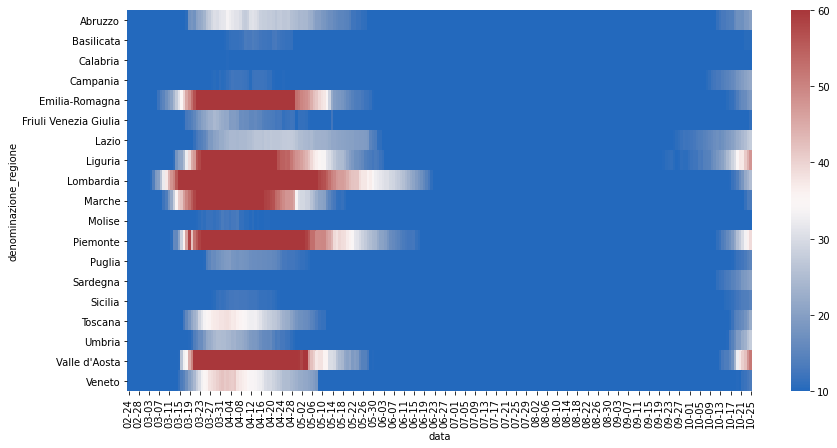

In [ ]:
plt.figure(figsize=(14, 7))
sns.heatmap(sub_pivot, vmin=10, vmax=60, cmap='vlag')

In [ ]:
sub_pivot.style.background_gradient(cmap='RdYlGn_r',axis=1)


In [ ]:
sub_n = sub_pivot.div(sub_pivot.max(axis=1), axis=0)


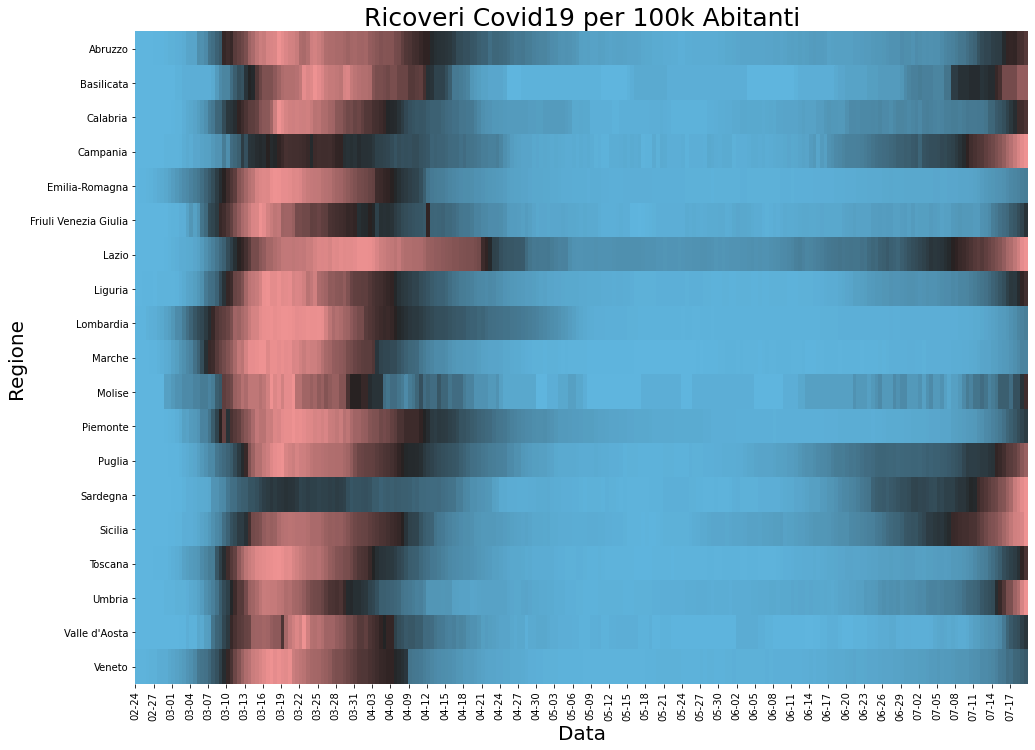

CPU times: user 1.11 s, sys: 85.7 ms, total: 1.2 s
Wall time: 1.22 s


In [ ]:
%%time

plt.figure(figsize=(16, 12))

ax = sns.heatmap(sub_n, vmin=0, vmax=1, cmap=sns.diverging_palette(230, 12, l=70, center="dark", as_cmap=True), cbar=False)
plt.xticks(np.arange(min(x), max(x)+1, 5))

plt.ylabel('Regione', fontdict={'size':20})
plt.xlabel('Data', fontdict={'size':20})
plt.title('Ricoveri Covid19 per 100k Abitanti', fontdict={'size':25})
plt.savefig('hm.png')
plt.show()


In [ ]:
sub_perc = regioni[['data','denominazione_regione','perc_tamponi_pos']]

In [ ]:
sub_perc.set_index('data', inplace=True)


In [ ]:
sub_perc.index = pd.to_datetime(sub_perc.index)

In [ ]:
sub_perc = sub_perc.loc['2020-05-14':]
sub_perc.reset_index(inplace=True)

In [ ]:
perc_pivot = sub_perc.pivot(index='denominazione_regione', columns='data', values='perc_tamponi_pos')

In [ ]:
perc_n = perc_pivot.div(perc_pivot.max(axis=1), axis=0)


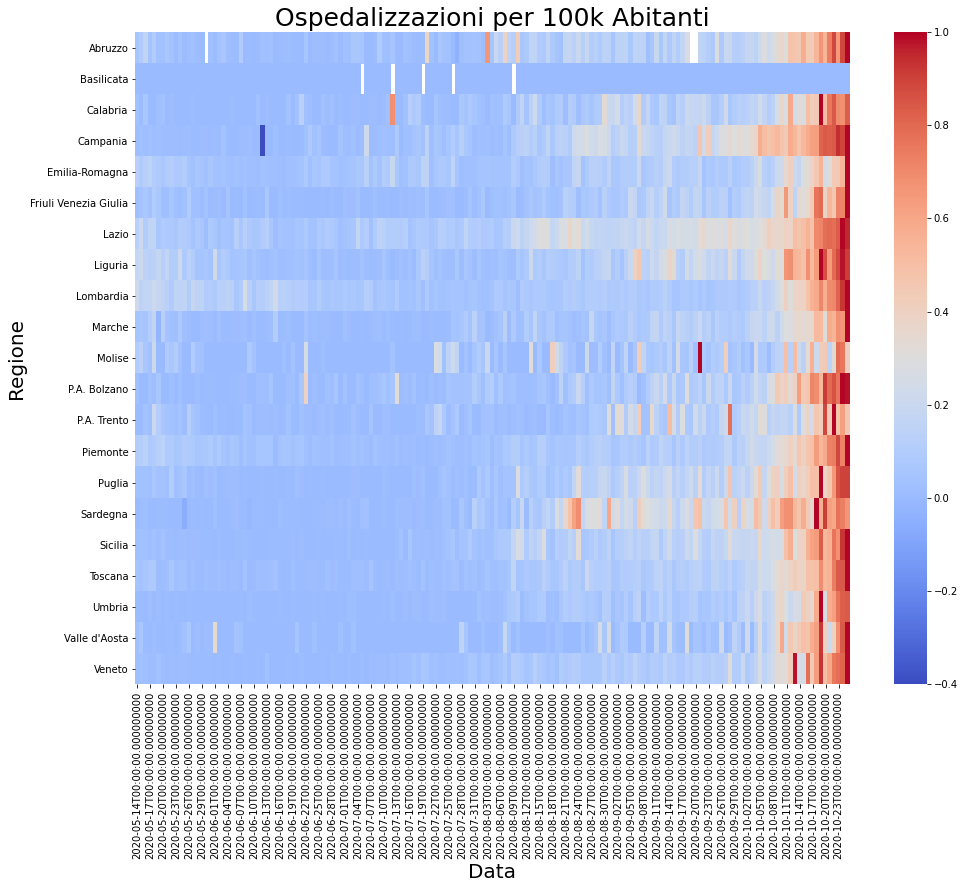

In [ ]:
plt.figure(figsize=(16, 12))

ax = sns.heatmap(perc_n, cmap='coolwarm')
#plt.xticks(np.arange(min(x), max(x)+1, 5))

plt.ylabel('Regione', fontdict={'size':20})
plt.xlabel('Data', fontdict={'size':20})
plt.title('Ospedalizzazioni per 100k Abitanti', fontdict={'size':25})
plt.savefig('hm.png')
plt.show()

In [ ]:
perc_pivot.style.background_gradient(cmap='RdYlGn_r',axis=1)


/usr/local/lib/python3.6/dist-packages/pandas/io/formats/style.py:1130: RuntimeWarning: invalid value encountered in double_scalars
  norm = colors.Normalize(smin - (rng * low), smax + (rng * high))


data,2020-05-14 00:00:00,2020-05-15 00:00:00,2020-05-16 00:00:00,2020-05-17 00:00:00,2020-05-18 00:00:00,2020-05-19 00:00:00,2020-05-20 00:00:00,2020-05-21 00:00:00,2020-05-22 00:00:00,2020-05-23 00:00:00,2020-05-24 00:00:00,2020-05-25 00:00:00,2020-05-26 00:00:00,2020-05-27 00:00:00,2020-05-28 00:00:00,2020-05-29 00:00:00,2020-05-30 00:00:00,2020-05-31 00:00:00,2020-06-01 00:00:00,2020-06-02 00:00:00,2020-06-03 00:00:00,2020-06-04 00:00:00,2020-06-05 00:00:00,2020-06-06 00:00:00,2020-06-07 00:00:00,2020-06-08 00:00:00,2020-06-09 00:00:00,2020-06-10 00:00:00,2020-06-11 00:00:00,2020-06-12 00:00:00,2020-06-13 00:00:00,2020-06-14 00:00:00,2020-06-15 00:00:00,2020-06-16 00:00:00,2020-06-17 00:00:00,2020-06-18 00:00:00,2020-06-19 00:00:00,2020-06-20 00:00:00,2020-06-21 00:00:00,2020-06-22 00:00:00,2020-06-23 00:00:00,2020-06-24 00:00:00,2020-06-25 00:00:00,2020-06-26 00:00:00,2020-06-27 00:00:00,2020-06-28 00:00:00,2020-06-29 00:00:00,2020-06-30 00:00:00,2020-07-01 00:00:00,2020-07-02 00:00:00,2020-07-03 00:00:00,2020-07-04 00:00:00,2020-07-05 00:00:00,2020-07-06 00:00:00,2020-07-07 00:00:00,2020-07-08 00:00:00,2020-07-09 00:00:00,2020-07-10 00:00:00,2020-07-11 00:00:00,2020-07-12 00:00:00,2020-07-13 00:00:00,2020-07-14 00:00:00,2020-07-15 00:00:00,2020-07-16 00:00:00,2020-07-17 00:00:00,2020-07-18 00:00:00,2020-07-19 00:00:00,2020-07-20 00:00:00,2020-07-21 00:00:00,2020-07-22 00:00:00,2020-07-23 00:00:00,2020-07-24 00:00:00,2020-07-25 00:00:00,2020-07-26 00:00:00,2020-07-27 00:00:00,2020-07-28 00:00:00,2020-07-29 00:00:00,2020-07-30 00:00:00,2020-07-31 00:00:00,2020-08-01 00:00:00,2020-08-02 00:00:00,2020-08-03 00:00:00,2020-08-04 00:00:00,2020-08-05 00:00:00,2020-08-06 00:00:00,2020-08-07 00:00:00,2020-08-08 00:00:00,2020-08-09 00:00:00,2020-08-10 00:00:00,2020-08-11 00:00:00,2020-08-12 00:00:00


KeyError: ignored

In [ ]:
sub

,data,denominazione_regione,totale_ospedalizzati,Regione,Popolazioneresidenti,osp_100k
0,02-24,Abruzzo,0,Abruzzo,1305770,0.00
1,02-25,Abruzzo,0,Abruzzo,1305770,0.00
2,02-26,Abruzzo,0,Abruzzo,1305770,0.00
3,02-27,Abruzzo,1,Abruzzo,1305770,0.08
4,02-28,Abruzzo,1,Abruzzo,1305770,0.08
...,...,...,...,...,...,...
4650,10-21,Veneto,495,Veneto,4907704,10.09
4651,10-22,Veneto,559,Veneto,4907704,11.39
4652,10-23,Veneto,579,Veneto,4907704,11.80
4653,10-24,Veneto,616,Veneto,4907704,12.55


In [ ]:
reg_latest =  regioni.set_index('data').sort_index().groupby('denominazione_regione').tail(1)

,stato,codice_regione,denominazione_regione,lat,long,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,casi_da_sospetto_diagnostico,casi_da_screening,totale_casi,tamponi,casi_testati,note,media_mobile,diff_tamponi,perc_tamponi_pos
data,,,,,,,,,,,,,,,,,,,,,,,
2020-10-25,ITA,13,Abruzzo,42.351222,13.398438,245,18,263,3822,4085,343,368,3469,514,6422.0,1646.0,8068,266853,166730.0,NaN,30.26,3368.0,10.93
2020-10-25,ITA,17,Basilicata,40.639471,15.805148,53,5,58,955,1013,68,77,639,44,479.0,1217.0,1696,96422,95573.0,NaN,33.12,1181.0,6.52
2020-10-25,ITA,18,Calabria,38.905976,16.594402,106,10,116,1897,2013,164,179,1671,106,1162.0,2628.0,3790,257594,255683.0,NaN,37.27,2960.0,6.05
2020-10-25,ITA,15,Campania,40.839566,14.250850,1151,113,1264,27456,28720,2417,2590,9322,571,36250.0,2363.0,38613,860203,587003.0,NaN,49.55,16906.0,15.32
2020-10-25,ITA,8,Emilia-Romagna,44.494367,11.341721,757,88,845,13983,14828,1186,1192,27345,4561,36934.0,9800.0,46734,1476451,804679.0,NaN,14.38,9644.0,12.36
2020-10-25,ITA,6,Friuli Venezia Giulia,45.649435,13.768136,112,23,135,2892,3027,251,334,4760,374,7375.0,786.0,8161,508057,219485.0,NaN,27.22,3800.0,8.79
2020-10-25,ITA,12,Lazio,41.892770,12.483667,1476,146,1622,21193,22815,1410,1541,10323,1100,13165.0,21073.0,34238,1294172,1057293.0,NaN,37.02,21832.0,7.06
2020-10-25,ITA,7,Liguria,44.411493,8.932699,696,41,737,5299,6036,276,657,15324,1691,16455.0,6596.0,23051,409770,214109.0,NaN,27.25,4195.0,15.66
2020-10-25,ITA,3,Lombardia,45.466794,9.190347,2326,231,2557,45426,47983,5298,5762,89145,17235,127457.0,26906.0,154363,2715715,1698094.0,NaN,21.77,35285.0,16.33
